<a href="https://colab.research.google.com/github/fedhere/PUS2020_MWalter/blob/master/HW3/reviewed_PUS_HW3_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pylab as plt
import pandas as pd
import numpy as np
import datetime


Question: Is the proportion of customers to subscribers riding citibikes higher on the weekend than weekdays?

# FBB the idea is fine, but is misses a justificaton: why would you ask this? subscribers are regular customers, while customers may be turists, so it makes sense to ask this, but it should be stated.

Significance Threshold: 5% or .05

Null Hypothesis: The proportion of customers to subscribers on the weekend is the same or less than the proportion of customers to subscribers on the weekdays.

Alternate Hypothesis: The proportion of customers to subscribers on the weekend is higher than the proportion of customers to subscribers on the weekdays. 


H0 = (customers on weekend / subscribers on weekend) <= (customers on weekdays / subscribers on weekdays)


H1 = (customers on weekend / subscribers on weekend) > (customers on weekdays / subscribers on weekdays)

In [ ]:
# Read in city bike data with datastring
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")

In [ ]:
# Add a datetime object
cbMay19["date"] = pd.to_datetime(cbMay19.starttime)

In [ ]:
# Get a day of the week column where 0 = Monday and 6 = Sunday
cbMay19['day'] = cbMay19.date.dt.weekday

In [ ]:
# Explore the distribution of customers per day of the week and subscribers per day of the week
cus = cbMay19.loc[cbMay19['usertype'] == 'Customer']
sub = cbMay19.loc[cbMay19['usertype'] == 'Subscriber']
cus['c'] = 1
counts_cus = cus.groupby(['day']).count().reset_index()
sub['c'] = 1
counts_sub = sub.groupby(['day']).count().reset_index()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, '# of Customers')

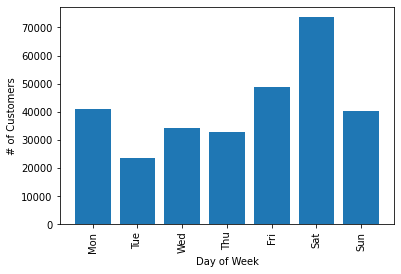

In [ ]:
# Plot # of customers by day of the week
plt.bar(counts_cus['day'], counts_cus['c'])
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks = counts_cus.index ,labels = labels, rotation = 'vertical')
plt.xlabel('Day of Week')
plt.ylabel('# of Customers')

Text(0, 0.5, '# of Subscribers')

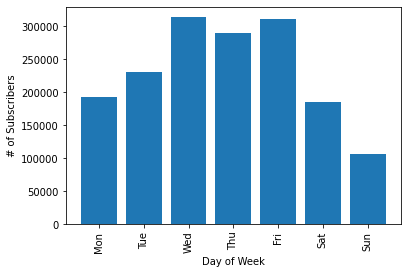

In [ ]:
# Plot # of subscribers by day of the week
plt.bar(counts_sub['day'], counts_sub['c'])
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks = counts_cus.index ,labels = labels, rotation = 'vertical')
plt.xlabel('Day of Week')
plt.ylabel('# of Subscribers')

In [ ]:
# Summary statistics for customers by day of week
c_mean = cus['day'].mean()
c_mode = cus['day'].mode()
c_std = cus['day'].std()

print('The average day that customers are riding is:')
print(c_mean)

print('The day that customers are riding the most is:')
print(c_mode[0])

print('The customers standard deviation is:')
print(c_std)

The average day that customers are riding is:
3.3832180224465827
The day that customers are riding the most is:
5
The customers standard deviation is:
1.9858564965073362


# FBB control the number of decimal digits you print - but also these days numbers do not mean anything: they should be mapped to days of the week

In [ ]:


print('The average day that customers are riding is: {:s}'.format(
              labels[int(c_mean + 0.5)]))

print('The day that customers are riding the most is: {:s}'.format(
              labels[int(c_mode[0] + 0.5)]))




The average day that customers are riding is: Thu
The day that customers are riding the most is: Sat


# FBB ^^^ and printed like this the concept of "average day that customers are riding" makes little sense. What does it actually mean?

In [ ]:


print('The average day that customers are riding is: {:.2f}'.format(
              c_mean))

print('The day that customers are riding the most is: {:.2f}'.format(
              c_mode[0]))

print('The customers standard deviation is: {:.2f}'.format(
              c_std))


The average day that customers are riding is: 3.38
The day that customers are riding the most is: 5.00
The customers standard deviation is: 1.99


In [ ]:
# Summary statistics for subscribers by day of week
s_mean = sub['day'].mean()
s_mode = sub['day'].mode()
s_std = sub['day'].std()

print('The average day that subscribers are riding is:')
print(s_mean)

print('The day that subscribers are riding the most is:')
print(s_mode[0])

print('The subscribers standard deviation is:')
print(s_std)

The average day that subscribers are riding is:
2.784000829449379
The day that subscribers are riding the most is:
2
The subscribers standard deviation is:
1.7338211759921858


In [ ]:
# Group by week day
cb_weekday = cbMay19.loc[cbMay19['day'] < 5]

In [ ]:
# Group by weekend
cb_weekend = cbMay19.loc[cbMay19['day'] > 5]

# FBB ^^^ what happens to saturday! cb_weekday should be >=5

In [ ]:
# Calculate proportion of customers to subscribers on the weekend
weekend_s = cb_weekend.loc[cb_weekend['usertype'] == 'Subscriber']
weekend_c = cb_weekend.loc[cb_weekend['usertype'] == 'Customer']
p0 = len(weekend_c) / len(weekend_s)
n0 = len(cb_weekend)

In [ ]:
# Calculate proportion of customers to subscribers on the weekday
weekday_s = cb_weekday.loc[cb_weekday['usertype'] == 'Subscriber']
weekday_c = cb_weekday.loc[cb_weekday['usertype'] == 'Customer']
p1 = len(weekday_c) / len(weekday_s)
n1 = len(cb_weekday)

In [ ]:
# Determine if weekend proportion is larger than weekday proportion
P0mP1 = p0 - p1
print ("difference between customer:subscriber on weekend to weekday: {:.2f}".format(P0mP1))
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")


difference between customer:subscriber on weekend to weekday: 0.24
We must check the significance before we reject the Null Hypothesis


In [ ]:
# Calculate Statistics
def ztest_p(p0, p1, n0, n1): 
  return (p0 * n0 + p1 * n1) / (n0 + n1)
def ztest_se(p0, p1, n0, n1):
  p = ztest_p(p0, p1, n0, n1)
  return np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
def zscore(p0, p1, n0, n1) : 
  return (p0 - p1) / ztest_se(p0, p1, n0, n1)

# calculations

z = zscore(p0, p1, n0, n1)
print ("The z statistics is %.2f"%z) 

The z statistics is 246.11


This high z-score means that we reject the Null Hypothesis. So the proportion of customers to subscribers on the weekend is significantly higher than customers to subscribers on the weekdays. 

In [ ]:
# Calculating Cohen's effect size
def r_effectsize (z, n0, n1) :
  return z / np.sqrt(n0 + n0)
def h_effectsize (p0, p1): 
  return 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

r = r_effectsize(z, n0, n1)
print ('r effect size {:.2f}'.format(r))

r effect size 0.45


In [ ]:
h = h_effectsize(p0, p1)
print ("Cohen's h effect size {:.2f}".format(h))

Cohen's h effect size 0.57


Because h is around .5 we have a medium effect size.

# FBB good